In [37]:
from tensorflow import keras
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler

In [38]:
company = "AAPL" #ticker symbol for a company (e.g. FB for Facebook)
start = datetime.datetime(2012, 1, 1) #starting date for dataset
end = datetime.datetime(2022, 1, 1) #ending date for dataset

In [39]:
df = web.DataReader(company, 'yahoo', start, end) #fetching data from yahoo finance api

In [40]:
model = keras.models.load_model(f'{company}_stock_price_predictor.h5')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [42]:
wts = []
for layer in model.layers:
    wts.append(layer.get_weights())

In [43]:
len(wts)

7

In [44]:
for i in wts:
    print("============")
    print(i)

[array([[ 0.02342265, -0.01083608, -0.0567895 , -0.01015112,  0.1610214 ,
         0.10982451, -0.02165207, -0.0605298 ,  0.06955722, -0.06925488,
         0.13055058,  0.11630351, -0.09544713, -0.04792023, -0.11735477,
         0.0102772 ,  0.05717387, -0.05387839,  0.15098265, -0.06176077,
         0.00826914,  0.17261992, -0.07126065,  0.00501272,  0.15728676,
        -0.02172651, -0.14082545,  0.02951072, -0.05535583,  0.03087837,
         0.17351745, -0.01638126,  0.23051788,  0.13256925, -0.12349317,
        -0.09584741,  0.12940791,  0.15113898,  0.04143365,  0.08643512,
         0.10179288,  0.16569132,  0.05083589, -0.08061784,  0.05524274,
         0.07593492, -0.02934393, -0.116345  ,  0.16748269,  0.03994929,
        -0.13913567, -0.18294346,  0.07004048,  0.13305342,  0.13360432,
         0.13153474, -0.11050795,  0.12683582,  0.07102422, -0.00919407,
        -0.01861755,  0.08546595,  0.0281069 , -0.02549688, -0.18991733,
        -0.05713332,  0.01735748,  0.01816228, -0.

In [45]:
for i in wts:
    print(len(i))

3
0
3
0
3
0
2


In [46]:
for i in wts:
    for j in i:
        print(len(j))

1
50
200
50
50
200
50
50
200
50
1


In [47]:
#loading test data
pred_days = 60
test_start = datetime.datetime(2022,1,1)
test_end = datetime.datetime.now()

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1,1))

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - pred_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

model_inputs

array([[0.77738038],
       [0.77503639],
       [0.77449549],
       [0.76668215],
       [0.76307606],
       [0.78020521],
       [0.78669629],
       [0.79697385],
       [0.81025645],
       [0.81326157],
       [0.81458383],
       [0.80983578],
       [0.80953524],
       [0.81362226],
       [0.81079744],
       [0.83315556],
       [0.81650715],
       [0.81145857],
       [0.81782942],
       [0.82666449],
       [0.82347906],
       [0.82540229],
       [0.82035371],
       [0.82257747],
       [0.80520786],
       [0.80490733],
       [0.81764912],
       [0.81770918],
       [0.82371943],
       [0.83868498],
       [0.8650098 ],
       [0.88111731],
       [0.88394214],
       [0.88628613],
       [0.88947155],
       [0.85863896],
       [0.87925415],
       [0.90966599],
       [0.90648056],
       [0.90041016],
       [0.88887049],
       [0.90978622],
       [0.94500618],
       [0.9684462 ],
       [0.96532085],
       [0.99471095],
       [0.97241299],
       [0.963

In [48]:
# Making predictions on testing data
X_test = []

for x in range(pred_days, len(model_inputs)):
    X_test.append(model_inputs[x-pred_days:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.77738038],
        [0.77503639],
        [0.77449549],
        ...,
        [0.99429028],
        [0.98719814],
        [0.98341175]],

       [[0.77503639],
        [0.77449549],
        [0.76668215],
        ...,
        [0.98719814],
        [0.98341175],
        [0.98341175]],

       [[0.77449549],
        [0.76668215],
        [0.76307606],
        ...,
        [0.98341175],
        [0.98341175],
        [1.01009717]],

       ...,

       [[0.95095636],
        [0.95107659],
        [0.9684462 ],
        ...,
        [0.96562138],
        [0.96381828],
        [0.98864064]],

       [[0.95107659],
        [0.9684462 ],
        [0.97115079],
        ...,
        [0.96381828],
        [0.98864064],
        [0.96832597]],

       [[0.9684462 ],
        [0.97115079],
        [0.95107659],
        ...,
        [0.98864064],
        [0.96832597],
        [0.9489129 ]]])

In [49]:
predicted_prices = model.predict(X_test)
predicted_prices

array([[0.9080332 ],
       [0.91034627],
       [0.91295964],
       [0.91542274],
       [0.91636306],
       [0.9149883 ],
       [0.9117278 ],
       [0.9073249 ],
       [0.9032247 ],
       [0.9001117 ],
       [0.89730775],
       [0.89491117],
       [0.8921423 ],
       [0.8881211 ],
       [0.88265437],
       [0.8757713 ],
       [0.86796474],
       [0.8595338 ],
       [0.85111535],
       [0.8431921 ],
       [0.8389274 ],
       [0.8397168 ],
       [0.8447327 ],
       [0.85276407],
       [0.86152804],
       [0.869562  ],
       [0.87597734],
       [0.8813557 ],
       [0.8861997 ],
       [0.8895233 ],
       [0.890399  ],
       [0.8891602 ],
       [0.88743687],
       [0.8858619 ],
       [0.88379246],
       [0.8808888 ],
       [0.8766488 ],
       [0.87040627],
       [0.86340916],
       [0.8570585 ],
       [0.8520209 ],
       [0.8479781 ],
       [0.8456355 ],
       [0.8448111 ],
       [0.8443695 ],
       [0.84293073],
       [0.8399105 ],
       [0.837

In [50]:
predicted_prices = scaler.inverse_transform(predicted_prices)
predicted_prices

array([[165.02834],
       [165.4132 ],
       [165.848  ],
       [166.25783],
       [166.41428],
       [166.18553],
       [165.64305],
       [164.91049],
       [164.22829],
       [163.71033],
       [163.2438 ],
       [162.84506],
       [162.38437],
       [161.71532],
       [160.80574],
       [159.66052],
       [158.36165],
       [156.95888],
       [155.5582 ],
       [154.23991],
       [153.53033],
       [153.66168],
       [154.49623],
       [155.83252],
       [157.2907 ],
       [158.6274 ],
       [159.6948 ],
       [160.58966],
       [161.39563],
       [161.94861],
       [162.09431],
       [161.8882 ],
       [161.60147],
       [161.33942],
       [160.9951 ],
       [160.51198],
       [159.80652],
       [158.76787],
       [157.60367],
       [156.54704],
       [155.70886],
       [155.03622],
       [154.64644],
       [154.50928],
       [154.4358 ],
       [154.19643],
       [153.69391],
       [153.20981],
       [152.66228],
       [151.91893],


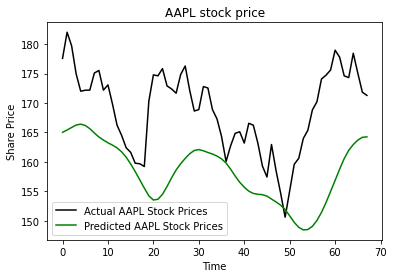

In [51]:
plt.plot(actual_prices, color="black", label=f"Actual {company} Stock Prices")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Stock Prices")
plt.title(f"{company} stock price")
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
# plt.show()
plt.savefig(f'{company}_predicted_vs_actual.jpg')